In [1]:
!git clone https://github.com/whitedevil7321/Tracks.git


Cloning into 'Tracks'...
remote: Enumerating objects: 16107, done.
remote: Total 16107 (delta 0), reused 0 (delta 0), pack-reused 16107 (from 1)
Receiving objects: 100% (16107/16107), 237.30 MiB | 29.34 MiB/s, done.
Updating files: 100% (16129/16129), done.


In [2]:
!ls Tracks


driving_log.csv  IMG


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Activation
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense,Convolution2D,MaxPooling2D,Dropout,Flatten
import cv2
import matplotlib.pyplot as plt

import os
import matplotlib.image as mpimg
from sklearn.utils import shuffle
from keras import activations
from sklearn.model_selection import train_test_split
import ntpath
import pandas as pd
import random


In [4]:
datadir="Tracks"
columns=['center','left','right','steering','throttle','reverse','speed']

In [5]:
data=pd.read_csv(os.path.join(datadir,"driving_log.csv"),names=columns)
pd.set_option('display.max_colwidth',1)

In [6]:
data.head()

,center,left,right,steering,throttle,reverse,speed
0,F:\Data\IMG\center_2024_11_30_15_23_03_584.jpg,F:\Data\IMG\left_2024_11_30_15_23_03_584.jpg,F:\Data\IMG\right_2024_11_30_15_23_03_584.jpg,0.0,0.0,0.0,0.000081
1,F:\Data\IMG\center_2024_11_30_15_23_03_687.jpg,F:\Data\IMG\left_2024_11_30_15_23_03_687.jpg,F:\Data\IMG\right_2024_11_30_15_23_03_687.jpg,0.0,0.0,0.0,0.000081
2,F:\Data\IMG\center_2024_11_30_15_23_03_802.jpg,F:\Data\IMG\left_2024_11_30_15_23_03_802.jpg,F:\Data\IMG\right_2024_11_30_15_23_03_802.jpg,0.0,0.0,0.0,0.000080
3,F:\Data\IMG\center_2024_11_30_15_23_03_911.jpg,F:\Data\IMG\left_2024_11_30_15_23_03_911.jpg,F:\Data\IMG\right_2024_11_30_15_23_03_911.jpg,0.0,0.0,0.0,0.000081
4,F:\Data\IMG\center_2024_11_30_15_23_04_024.jpg,F:\Data\IMG\left_2024_11_30_15_23_04_024.jpg,F:\Data\IMG\right_2024_11_30_15_23_04_024.jpg,0.0,0.0,0.0,0.000081


In [7]:
def path_leaf(path):
  head,tail=ntpath.split(path)
  return tail


data['center']=data['center'].apply(path_leaf)
data['left']=data['left'].apply(path_leaf)
data['right']=data['right'].apply(path_leaf)

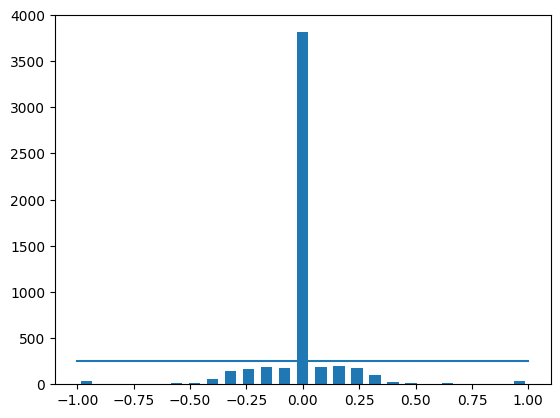

In [8]:
num_bins =25
hist,bins=np.histogram(data['steering'],num_bins)
samples_per_bin=250
center=(bins[:-1]+bins[1:])*0.5
center

plt.bar(center,hist,width=0.05)

plt.plot((np.min(data['steering']),np.max(data['steering'])),(samples_per_bin,samples_per_bin))

Total Data: 5376
Removed list: [982, 3182, 3380, 4216, 956, 4016, 2413, 3250, 1499, 3949, 1772, 4724, 248, 4405, 782, 852, 807, 4049, 1014, 2951, 123, 3046, 558, 4615, 1024, 333, 1881, 3251, 1439, 1690, 3843, 2224, 3968, 4639, 181, 1450, 1299, 276, 4963, 3980, 3646, 289, 2453, 2465, 5112, 4195, 532, 74, 4685, 138, 2185, 342, 3257, 317, 486, 2996, 4032, 1177, 2775, 3907, 654, 3452, 4749, 726, 3873, 5194, 4154, 3393, 820, 4668, 2280, 4887, 3819, 4566, 4034, 51, 882, 196, 3100, 3252, 4303, 3899, 4521, 283, 4430, 721, 5338, 1686, 1302, 4568, 1394, 4053, 757, 3358, 2193, 4821, 2089, 4701, 5306, 1937, 4125, 3144, 5187, 941, 4437, 1966, 2938, 1520, 4325, 1684, 2286, 4917, 2435, 829, 4740, 4924, 2021, 1687, 4447, 4989, 4021, 652, 4657, 5344, 4697, 1455, 2398, 3933, 89, 2415, 4139, 3538, 2017, 222, 1353, 2885, 4489, 696, 4319, 1724, 2316, 1281, 1867, 4998, 2309, 5374, 158, 2945, 4286, 1868, 2197, 2190, 1672, 1670, 3790, 28, 3371, 4431, 4030, 1895, 4911, 4552, 3215, 934, 3556, 1887, 1215, 3581, 

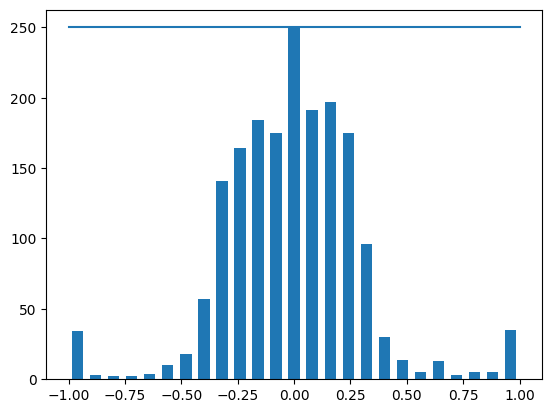

In [9]:
print("Total Data:",len(data))
remove_list=[]
for j in range(num_bins):
  list_=[]
  for i in range(len(data['steering'])):
    if data['steering'][i]>=bins[j] and data['steering'][i]<=bins[j+1]:
      list_.append(i)
  list_=shuffle(list_)
  list_=list_[samples_per_bin:]
  remove_list.extend(list_)

print("Removed list:",remove_list)
data.drop(data.index[remove_list],inplace=True)
print("Remaining data:",len(data))



hist,_=np.histogram(data['steering'],(num_bins))
plt.bar(center,hist,width=0.05)
plt.plot((np.min(data['steering']),np.max(data['steering'])),(samples_per_bin,samples_per_bin))

In [10]:
print(data.iloc[1])
def load_img_steering(datadir,df):

  image_path=[]
  steering=[]
  for i in range(len(data)):
    indexed_data=data.iloc[i]
    center,left,right=indexed_data[0],indexed_data[1],indexed_data[2]
    image_path.append(os.path.join(datadir,center.strip()))
    steering.append(float(indexed_data[3]))
  image_paths=np.array(image_path)
  steerings=np.array(steering)
  return image_paths,steerings


image_path,steering=load_img_steering((datadir+'/IMG/'),data)
steering



center      center_2024_11_30_15_23_05_891.jpg
left        left_2024_11_30_15_23_05_891.jpg  
right       right_2024_11_30_15_23_05_891.jpg 
steering   -0.170713                          
throttle    1.0                               
reverse     0.0                               
speed       8.560368                          
Name: 21, dtype: object


<ipython-input-10-b606690affb5>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  center,left,right=indexed_data[0],indexed_data[1],indexed_data[2]
<ipython-input-10-b606690affb5>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  steering.append(float(indexed_data[3]))


array([ 0.       , -0.1707129, -0.2150362, ...,  0.       ,  0.       ,
        0.       ])

In [11]:
x_train,x_valid,y_train,y_valid=train_test_split(image_path,steering,test_size=0.2,random_state=6)

Text(0.5, 1.0, 'Training Histogram')

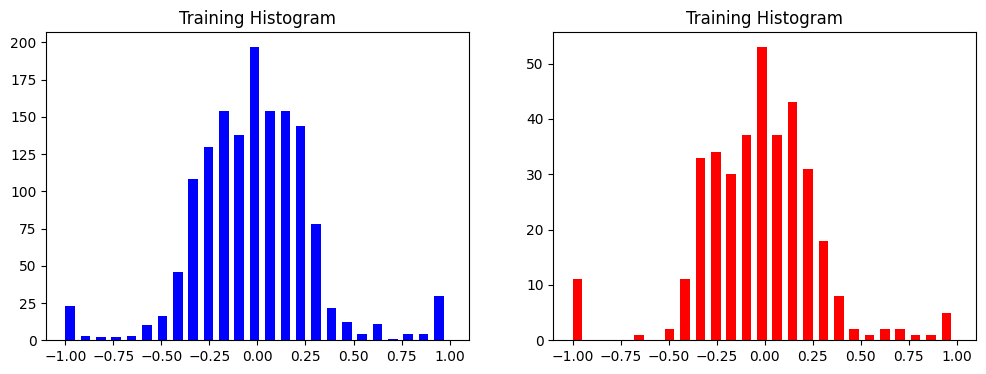

In [12]:
fig,axes=plt.subplots(1,2,figsize=(12,4))
axes[0].hist(y_train,bins=num_bins,width=0.05,color='blue')
axes[0].set_title("Training Histogram")


axes[1].hist(y_valid,bins=num_bins,width=0.05,color='red')
axes[1].set_title("Training Histogram")

In [13]:
def img_preprocessing(img):
  img=mpimg.imread(img)
  img=img[60:135,:,:]
  img=cv2.cvtColor(img,cv2.COLOR_RGB2YUV)
  img=cv2.GaussianBlur(img,(3,3),0)
  img=cv2.resize(img,(200,60))
  img=img/255
  return img



def img_preprocessing(img):
    # Load the image
    img = mpimg.imread(img)  # Or use cv2.imread(img) if needed

    # Crop the image to focus on the region of interest
    img = img[60:135, :, :]

    # If your model expects RGB, skip the YUV conversion
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)  # Remove this if your model uses RGB

    # Resize the image to (200, 66), matching your model's expected input size
    img = cv2.resize(img, (200, 66))  # Ensure this matches your model's input dimensions

    # Optionally, apply GaussianBlur if needed
    img = cv2.GaussianBlur(img, (3, 3), 0)

    # Normalize the image by dividing by 255
    img = img / 255.0

    return img


Text(0.5, 1.0, 'Preprocessed Image')

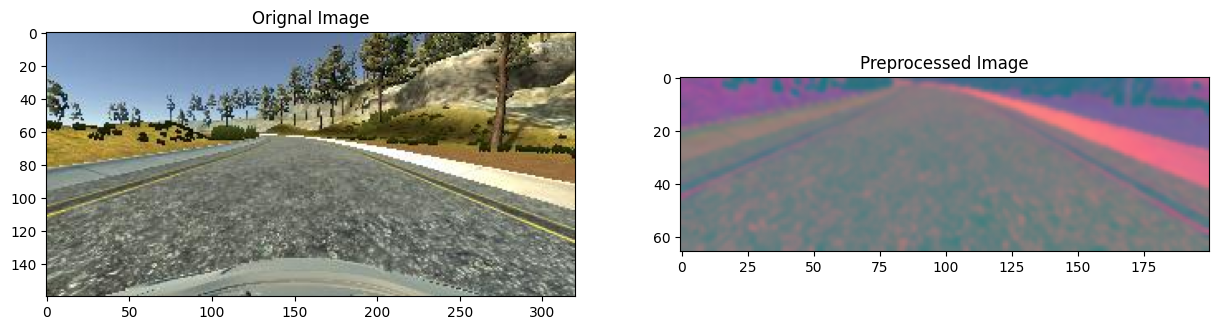

In [14]:
img=image_path[10]

orignal_image=mpimg.imread(img)
preprocessed_image=img_preprocessing(img)

fig,axes=plt.subplots(1,2,figsize=(15,10))
#fig, axes = plt.subplots(1, 2, figsize=(15, 10))
axes[0].imshow(orignal_image)
axes[0].set_title("Orignal Image")

axes[1].imshow(preprocessed_image)

axes[1].set_title("Preprocessed Image")

In [15]:
print(preprocessed_image.shape)

(66, 200, 3)


In [16]:
x_train=np.array(list(map(img_preprocessing,x_train)))

In [17]:
x_valid=np.array(list(map(img_preprocessing,x_valid)))

In [18]:
def nvmodel():
  model=Sequential()
  model.add(Convolution2D(24,(5,5),strides=(2,2),input_shape=(66, 200, 3),activation='elu'))
  model.add(Convolution2D(36,(5,5),strides=(2,2),activation='elu'))
  model.add(Convolution2D(48,(3,3),strides=(2,2),activation='elu'))
  model.add(Convolution2D(64,(3,3),activation='elu'))
  model.add(Convolution2D(64,(3,3),activation='elu'))
  model.add(Dropout(0.5 ))


  model.add(Flatten())
  model.add(Dense(100,activation='elu'))

  model.add(Dense(50,activation='elu'))

  model.add(Dense(10,activation='elu'))

  model.add(Dense(1))




  optimizer=Adam(learning_rate=0.0001)

  model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
  return model


In [19]:
model=nvmodel()
print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 31, 98, 24)          │           1,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 47, 36)          │          21,636 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 6, 23, 48)           │          15,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 21, 64)           │          27,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 2, 19, 64)           │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 19, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2432)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         243,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,571 (1.34 MB)

 Trainable params: 352,571 (1.34 MB)

 Non-trainable params: 0 (0.00 B)

None


In [20]:
history=model.fit(x_train,y_train,validation_data=(x_valid,y_valid),verbose=1,shuffle=1,epochs=30,batch_size=100)

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 683ms/step - loss: 4.3447 - mean_squared_error: 4.3447 - val_loss: 0.1392 - val_mean_squared_error: 0.1392
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 521ms/step - loss: 0.1810 - mean_squared_error: 0.1810 - val_loss: 0.1369 - val_mean_squared_error: 0.1369
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 649ms/step - loss: 0.1268 - mean_squared_error: 0.1268 - val_loss: 0.0959 - val_mean_squared_error: 0.0959
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 648ms/step - loss: 0.1032 - mean_squared_error: 0.1032 - val_loss: 0.0951 - val_mean_squared_error: 0.0951
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 522ms/step - loss: 0.0980 - mean_squared_error: 0.0980 - val_loss: 0.0963 - val_mean_squared_error: 0.0963
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 686ms/step - loss: 0.0909 - mean_squared_error: 0.0909 - val_loss: 0.0970 - val_mean_squared_error: 0.0970
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 654ms/step - loss: 0.0926 - mean_squared_error: 0.0926 - val_loss:

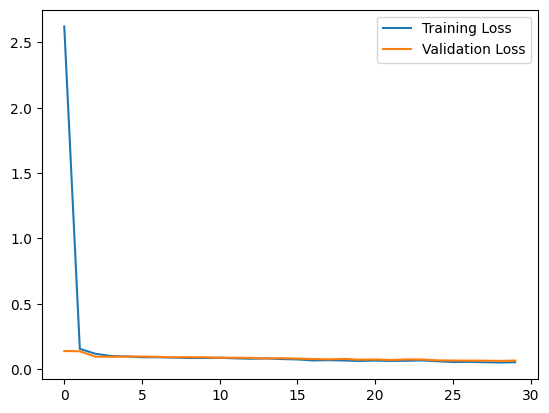

In [21]:
plt.plot(history.history['loss'],label="Training Loss")
plt.plot(history.history['val_loss'],label="Validation Loss")
plt.legend()

In [22]:
model.save("model.h5")

In [23]:
from google.colab import files
files.download("model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>